# <a href="https://thetahat.ru/courses/ad">Введение в анализ данных</a>
## Домашнее задание 4, часть 1. Нейронные сети.

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_ds25_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="https://miptstats.github.io/theta_grader_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `<...>`.
* В markdown-ячейка, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):

* Задача 1 &mdash; 60 баллов
* **Остальные задачи будут выложены в части 2 с отдельным дедлайном.**

Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [ ]:
# Bot check

# HW_ID: fpmi_ad4_part1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [4]:
from typing import Tuple
import numpy as np
import torch
from torchvision import transforms
from torchvision.datasets import MNIST
import time
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Допишите сюда необходимые импорты

---
### <font color="blue"><i>Легкая часть</i></font>

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->
---
### Задача 1.

**При решении данной задачи можно использовать ИИ-инструменты только для построения графиков и оформления документаций к коду.**

Обратимся вновь к уже знакомому нам <a href="https://thetahat.ru/courses/ad/main/1/main_sem_kNN">по первому занятию</a> датасету **MNIST**. Как вы помните, этот набор данных содержит изображения рукописных цифр, каждое из которых имеет размер **28x28**. Всего в датасете содержится **60 000** изображений в обучающей выборке и еще **10 000** — в тестовой.

На первом занятии мы работали с сокращенной версией этого датасета, содержащей **1797** изображений размером **8x8**.

В этой домашней работе мы выберем более "сложный" вариант, а именно:

* вернемся к исходной версии датасета с изображениями размером **28x28**,
* сожмем изображения в два раза по каждой из размерностей, то есть до **14x14**,
* оставим **10 000** изображений в обучающей выборке.

> *Примечание.* При желании вы можете усложнить задачу &mdash; отказаться от сжатия изображений и/или увеличить количество данных. Однако учтите, что в таком случае модели будут работать дольше, и, возможно, вам будет сложнее достичь желаемых результатов.

**Наша задача остается прежней:** *по изображению определить, какая цифра на нем нарисована.*
На этот раз мы будем решать ее с помощью простых нейронных сетей. Также мы заглянем "под капот" нейросетей, чтобы лучше понять процесс их обучения.

> *Примечание.* Обычно подобные задачи, связанные с изображениями, решаются с помощью сверточных нейронных сетей, которые лучше подходят для работы с изображениями. Они станут темой нашего следующего занятия, ждем всех!

Ниже представлена готовая функция для загрузки и предварительной обработки данных.
В рамках этой функции мы выполняем следующие шаги.
* Загрузка исходных данных.
* Сохранение **10 000** изображений в качестве обучающей выборки.
* Сжатие изображений в два раза по каждой из осей, что приводит к размеру **14x14**..
* Растягиваем изображение размером **14x14** в вектор длиной $14 \cdot 14 = 196$. Более подробно эта операция описана <a href="https://thetahat.ru/courses/ad/main/1/main_sem_kNN">в первой лекции</a>.

In [5]:
def load_mnist(
    train_size: int = 6000, target_size: int = 14
) -> Tuple[torch.Tensor, torch.Tensor, torch.Tensor, torch.Tensor]:
    """Загружает и подготавливает данные MNIST для обучения и тестирования.

    Параметры:
    train_size (int): Количество обучаемых данных. По умолчанию 6000.
    target_size (int): Размер, до которого уменьшаются изображения. По умолчанию 14.

    Возвращает:
    train_images (torch.Tensor): Тензор с изображениями для обучения.
    train_labels (torch.Tensor): Тензор с метками для обучения.
    test_images (torch.Tensor): Тензор с изображениями для тестирования.
    test_labels (torch.Tensor): Тензор с метками для тестирования.

    Данные загружаются из набора MNIST, нормализуются, уменьшаются в
    размере и преобразуются в векторы. Для обучения используется только
    часть (train_fraction) от исходного набора данных.
    """

    PIXEL_MAX_VALUE = 255.0  # Для нормализации значений пикселей

    # Создаем преобразование для данных: конвертируем изображения в тензоры PyTorch
    transform = transforms.Compose(
        [
            # Преобразует изображение в тензор и нормализует значения в диапазоне [0, 1]
            transforms.ToTensor(),
        ]
    )

    # Загружаем обучающий и тестовый наборы данных MNIST
    train_dataset = MNIST(root="./data", train=True, transform=transform, download=True)
    test_dataset = MNIST(root="./data", train=False, transform=transform, download=True)

    # Выбираем часть обучающего набора данных
    train_indices = np.random.choice(len(train_dataset), train_size, replace=False)

    # Преобразуем изображения в тензоры и нормализуем их, деля на PIXEL_MAX_VALUE
    train_images = train_dataset.data[train_indices].unsqueeze(1).float() / PIXEL_MAX_VALUE
    test_images = test_dataset.data.unsqueeze(1).float() / PIXEL_MAX_VALUE

    # Уменьшаем размер изображений до target_size x target_size с использованием билинейной интерполяции
    train_images = torch.nn.functional.interpolate(
        train_images, size=(target_size, target_size), mode="bilinear", align_corners=False
    )
    test_images = torch.nn.functional.interpolate(
        test_images, size=(target_size, target_size), mode="bilinear", align_corners=False
    )

    # Преобразуем изображения в векторы (разворачиваем в одномерные массивы)
    train_images = train_images.view(train_size, -1)
    test_images = test_images.view(len(test_dataset), -1)

    # Получаем метки для выбранных обучающих и всех тестовых данных
    train_labels = train_dataset.targets[train_indices]
    test_labels = test_dataset.targets

    return train_images, train_labels, test_images, test_labels

Загрузим данные и посмотрим на их размерности

In [6]:
train_images, train_labels, test_images, test_labels = load_mnist()

print("Train:", train_images.shape, train_labels.shape)
print("Test:", test_images.shape, test_labels.shape)

Train: torch.Size([6000, 196]) torch.Size([6000])
Test: torch.Size([10000, 196]) torch.Size([10000])


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 7511c0781e8d08a269da6c1d50d763d9 -->
**1.** Используя `Sequential` подход в PyTorch, напишите модель нейронной сети по следующему описанию.

* **Вход**: изображение в виде вектора.
* **Два линейных слоя** с промежуточной размерностью 64.
* **Функция активации**: между линейными слоями используется `ReLU`, а на выходе второго слоя — отсутствует (или используется тождественная функция).
* **Выход**: вектор логитов размером 10, соответствующий количеству классов.

> Эта нейронная сеть для изображения $x$ оценивает вектор логитов $\left(\ell_0(x),..., \ell_9(x)\right)$ принадлежности к каждому из классов, аналогично логистической регрессии. Имея оценку логитов $\left(\ell_0(x),..., \ell_9(x)\right)$ , можно получить оценку вероятности $p_k$ для каждого класса по следующей формуле, используя softmax-функцию (обобщение логистической сигмоиды)
> $$
\widehat{p}_k(x) = \frac{\exp\left(\widehat{\ell}(x)\right)}{\exp\left(\widehat{\ell}_0(x)\right) +... + \exp\left(\widehat{\ell}_9(x)\right)},
$$
> которая реализуется с помощью функции `nn.functional.softmax(..., dim=-1)`. В качестве оценки класса можно взять класс с наибольшей вероятностью, что можно реализовать с помощью метода `argmax(axis=...)` у тензора в PyTorch.

In [7]:
model = nn.Sequential(
    nn.Linear(in_features=196, out_features=64),
    nn.ReLU(),
    nn.Linear(in_features=64, out_features=10)
)

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- a0e6b216258fdc0b22b7276d9527dea6 -->
**2.** **Напишите цикл обучения нейросети**, используя кросс-энтропию `nn.CrossEntropyLoss()` качестве лосс-функции. Это обобщение бинарной кросс-энтропии, которую мы рассматривали на лекции по логистической регрессии. Ее реализация в PyTorch принимает на вход логиты (что и возвращает наша нейросеть) и истинные метки классов. Обучайте сеть на полном наборе данных с помощью метода градиентного спуска `torch.optim.SGD`, не разбивая данные на случайные батчи (как это делается в SGD).


Примерно каждые 5-10 итераций выполняйте следующие действия:

* Получите текущие предсказания классов для обучающей и тестовой выборок.
* Посчитайте точность классификации для этих выборок.
* Постройте график зависимости точности классификации от номера итерации. Перед построением графика используйте `clear_output(wait=True)` для плавной очистки холста.
* Сохраните следующие значения:
    * Значение лосс-функции.
    * Точность классификации для обучающей и тестовой выборок.
    * Матрицы весов для каждого слоя.

*Замечания:*
* Рекомендуем сохранять данные в заранее подготовленный словарь, ключи которого соответствуют именам переменных (например, `"weights_layer_2"`), а значения словаря представляют собой списки значений этих переменных по итерациям.
* При сохранении не забывайте вызывать метод `.detach().numpy()` для преобразования матриц в массивы numpy. Также может потребоваться заново инициализировать матрицы с помощью `np.array(...)`, чтобы сохранить сами матрицы, а не ссылки на них, по которым значения меняются в процессе обучения сети.

Выполните 10 000 итераций обучения. Сколько времени это заняло?

In [5]:
#Функция потерь и оптимизатор
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [6]:
#структуру для сохранения истории обучения.
history = {
    "train_loss": [],
    "train_acc": [],
    "test_acc": [],
    "weights_layer_1": [],
    "weights_layer_2": []
}

In [7]:
def accuracy(logits: torch.Tensor, labels: torch.Tensor) -> float:
    """
    Возвращает процент правильных предсказаний (accuracy).
    logits: выход модели размер [N, 10]
    labels: истинные метки (целые числа от 0 до 9), размер [N]
    """
    preds = torch.argmax(logits, dim=1)
    return (preds == labels).float().mean().item() * 100

In [11]:
X_train = train_images  # (N, 196)
y_train = train_labels  # (N,)
X_test = test_images    # (M, 196)
y_test = test_labels    # (M,)

Iteration 10000/10000
Loss: 0.2956
Train Accuracy: 91.43%
Test  Accuracy: 90.96%


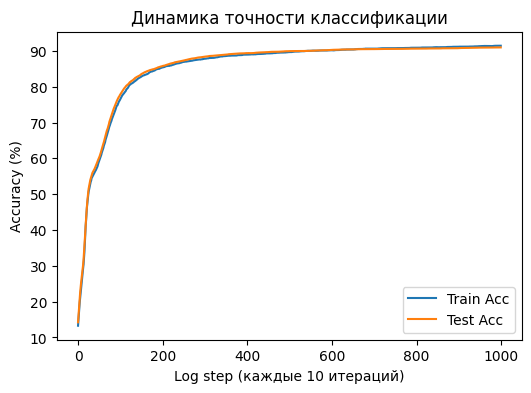

Обучение заняло 149.11 секунд.


In [15]:
num_iterations = 10_000
start_time = time.time()

for i in range(num_iterations):
    # Прямой проход (forward)
    logits_train = model(X_train)
    loss_value = loss_fn(logits_train, y_train)

    # Обнуление градиентов и обратный проход (backward)
    optimizer.zero_grad()
    loss_value.backward()

    # Шаг оптимизатора (обновление весов)
    optimizer.step()

    # Каждые 10 итераций будем считать точность и сохранять показатели
    if (i + 1) % 10 == 0:
        # Точность на обучающей части
        acc_train = accuracy(logits_train, y_train)

        # Точность на тестовой части
        with torch.no_grad():
            logits_test = model(X_test)
            acc_test = accuracy(logits_test, y_test)

        # Сохраняем историю
        history["train_loss"].append(loss_value.item())
        history["train_acc"].append(acc_train)
        history["test_acc"].append(acc_test)

        # Сохраняем копии весов (detach + .numpy())
        # layer_1: первый Linear, layer_2: второй Linear
        w1 = model[0].weight.detach().cpu().numpy().copy()
        w2 = model[2].weight.detach().cpu().numpy().copy()
        history["weights_layer_1"].append(w1)
        history["weights_layer_2"].append(w2)

        # Выводим промежуточные результаты
        clear_output(wait=True)
        print(f"Iteration {i+1}/{num_iterations}")
        print(f"Loss: {loss_value.item():.4f}")
        print(f"Train Accuracy: {acc_train:.2f}%")
        print(f"Test  Accuracy: {acc_test:.2f}%")

        # Для наглядности построим график точности
        plt.figure(figsize=(6, 4))
        plt.plot(history["train_acc"], label="Train Acc")
        plt.plot(history["test_acc"],  label="Test Acc")
        plt.xlabel("Log step (каждые 10 итераций)")
        plt.ylabel("Accuracy (%)")
        plt.legend()
        plt.title("Динамика точности классификации")
        plt.show()

end_time = time.time()

print(f"Обучение заняло {end_time - start_time:.2f} секунд.")

Проверьте себя, точность классификации на тестовой выборке должна быть около $90\%$. Если вы получили значительно меньший результат (менее $85\%$), попробуйте явно инициализировать веса сети и настроить разные значения learning_rate для разных параметров (посмотрите примеры с занятия). Если эти меры не помогут, то стоит поискать ошибку. Да, обучение нейронных сетей — это непростой процесс.

In [ ]:
#Вроде и так все хорошо

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 50631d10e9d4fcecb3da59913ebde5b7 -->
**3.** Теперь самое интересное &mdash; заглянем под капот нашей нейросети!

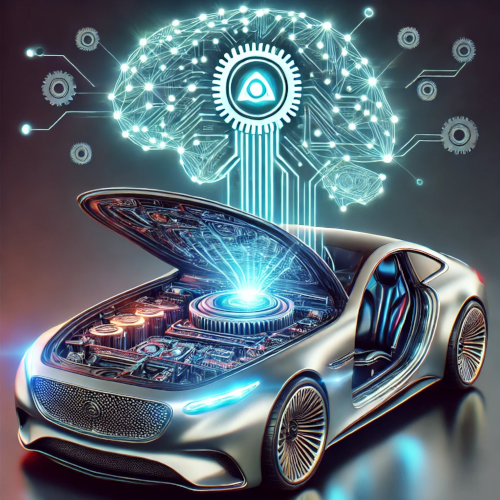

Для более глубокого понимания работы нейросети **визуализируем матрицы весов** для нескольких итераций обучения. Тем самым, вы сможете оценить, как меняется поведение модели в процессе обучения.

1. Выберите примерно 10 итераций обучения, включая первую и последнюю.
2. Для каждого слоя настройте график, используя предоставленный шаблон.

Обратите внимание, что для корректной визуализации матрицы весов ее необходимо **транспонировать**. Например, для первого слоя вертикальная ось должна соответствовать входу сети, а горизонтальная — промежуточной размерности.

В качестве цветовой палитры выбрана `"RdBu"`, что позволяет отображать положительные числа матрицы красным цветом, а отрицательные — синим. Чтобы достичь этого, также **необходимо установить параметры `vmin` и `vmax`** симметрично относительно нуля, чтобы нули отображались белым цветом. Подберите эти значения таким образом, чтобы получить наиболее четкую картинку, на которой выделяются определенные группы пикселей.

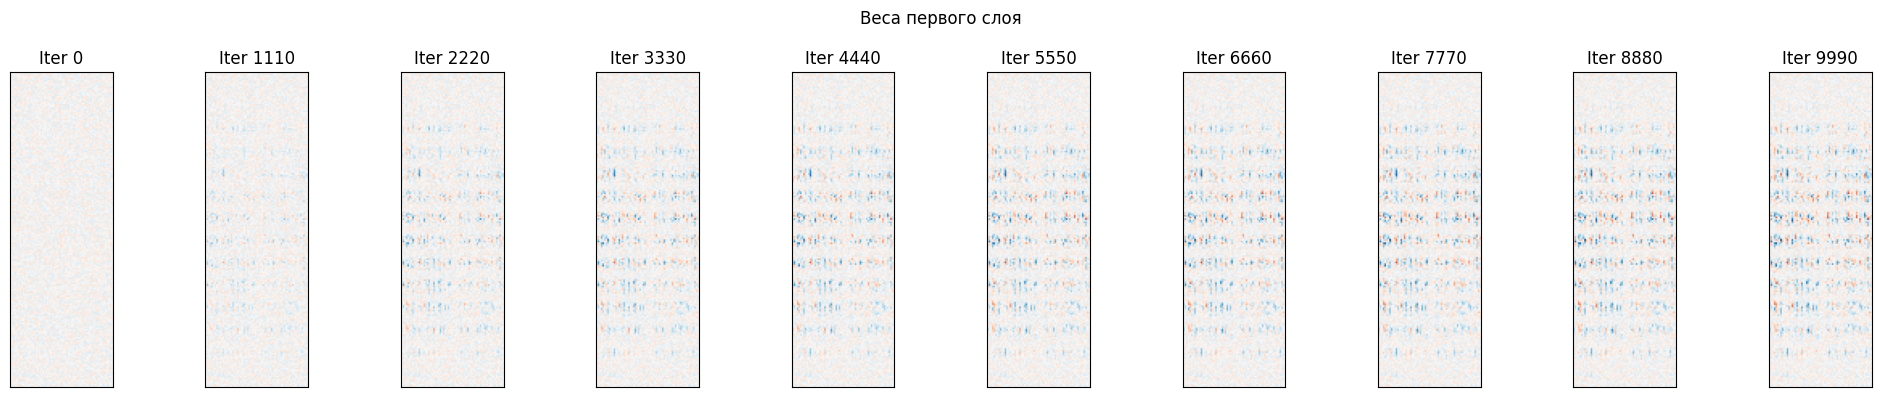

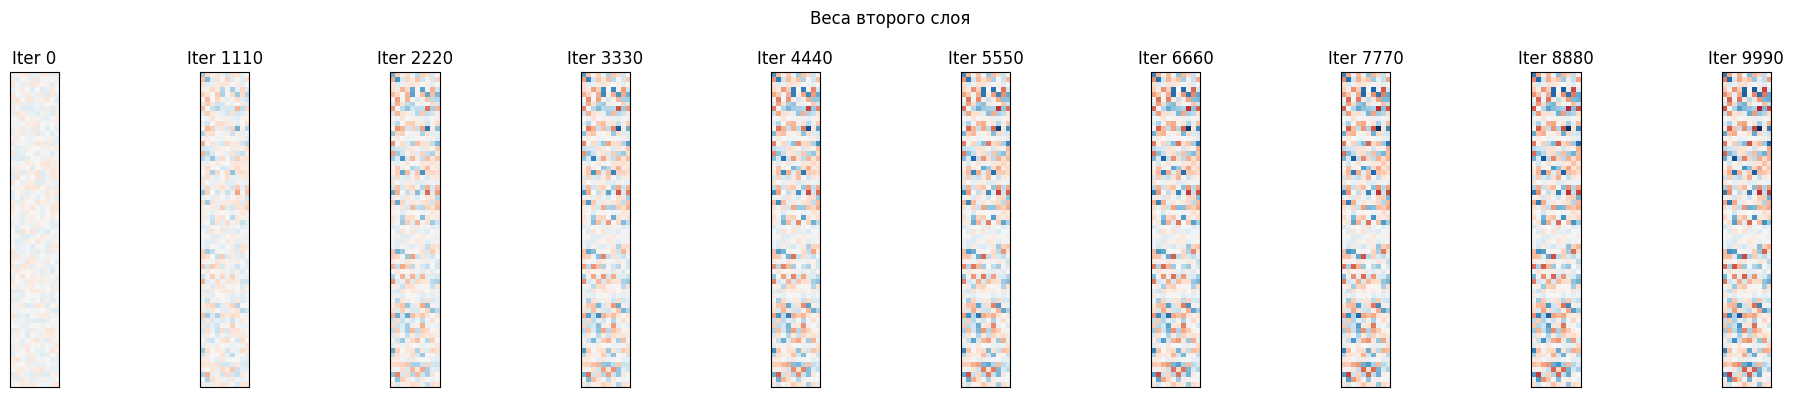

In [17]:

# возьмём 10 индексов (включая начало и конец) из истории обучения.
num_snapshots = 10
all_steps = len(history["weights_layer_1"])
indices = np.linspace(0, all_steps - 1, num_snapshots, dtype=int)

# Чтобы цветовая шкала была одинаковой для всех изображений (в каждом слое),
# найдём глобальный максимум модуля весов на выбранных итерациях для layer_1:
vmax_layer1 = max(np.abs(history["weights_layer_1"][idx]).max() for idx in indices)
#для layer_2:
vmax_layer2 = max(np.abs(history["weights_layer_2"][idx]).max() for idx in indices)

# ===== Визуализируем веса первого слоя =====
plt.figure(figsize=(2 * num_snapshots, 4))
for i, idx in enumerate(indices):
    plt.subplot(1, num_snapshots, i + 1)
    w = history["weights_layer_1"][idx]
    w_t = w.T  # теперь (196, 64)
    plt.imshow(w_t, cmap="RdBu", vmin=-vmax_layer1, vmax=vmax_layer1)
    plt.xticks([])
    plt.yticks([])
    plt.title(f"Iter {idx*10}")
plt.suptitle("Веса первого слоя")
plt.tight_layout()
plt.show()

# ===== Визуализируем веса второго слоя =====
plt.figure(figsize=(2 * num_snapshots, 4))
for i, idx in enumerate(indices):
    plt.subplot(1, num_snapshots, i + 1)
    w = history["weights_layer_2"][idx]
    w_t = w.T
    plt.imshow(w_t, cmap="RdBu", vmin=-vmax_layer2, vmax=vmax_layer2)
    plt.xticks([])
    plt.yticks([])
    plt.title(f"Iter {idx*10}")
plt.suptitle("Веса второго слоя")
plt.tight_layout()
plt.show()

Какие выводы можно сделать, основываясь на полученных визуализациях? 
Подумайте, почему на больших итерациях для первого слоя начинают выделяться определенные пиксели? Почему именно эти пиксели? 

*Подсказка: вспомните, как устроены входные изображения цифр, с которыми мы работаем.*

**Ответ:**
1. **На первых итерациях** веса первого слоя выглядят как случайный шум — модель ещё ничего не «знает» о структуре данных.  

2. **По мере обучения** (Iter 1110 → Iter 9990) в весах первого слоя чётко начинают выделяться именно те пиксели, на которых в большинстве изображений MNIST лежат штрихи цифр — то есть центральная область и характерные контуры цифр. Пиксели фона (обычно белые, в углах кадра) остаются близкими к нулю, поскольку они не дают модели никакой полезной информации для различения классов.  

3. **Почему именно эти пиксели?**  
   - Входные изображения цифр имеют высокую дисперсию интенсивности именно в областях, где нарисованы штрихи — сеть учится усиливать веса там, где изменение яркости важно для классификации, и подавлять (обнулять) веса фона.  
   - Каждый нейрон первого слоя фактически становится «детектором» локального паттерна (вертикальной или горизонтальной линии, дуги и т.д.), характерного для некоторой группы цифр.  

4. **Веса второго слоя** менее «пространственно структурированы», потому что этот слой уже объединяет выходы детекторов первого слоя в логиты для 10 классов. Здесь мы видим разноцветные «точки» — комбинации признаков, соответствующие разным цифрам, а не прямую привязку к положению пикселя.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 0db56d0ce9aedf85256c3f57f6ef20b0 -->
Попробуйте **улучшить точность классификации**, рассмотрев больше нейронов в промежуточном слое.

In [17]:
# Допустим, увеличим скрытый слой до 256 нейронов
hidden_size = 256

# Определяем новую модель
model = nn.Sequential(
    nn.Linear(in_features=196, out_features=hidden_size),
    nn.ReLU(),
    nn.Linear(in_features=hidden_size, out_features=10)
)

# Функция потерь и оптимизатор остаются теми же
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


In [18]:
num_iterations = 10_000
history_bigger_layer = {
    "train_loss": [],
    "train_acc": [],
    "test_acc": []
}

def accuracy(logits: torch.Tensor, labels: torch.Tensor) -> float:
    preds = torch.argmax(logits, dim=1)
    return (preds == labels).float().mean().item() * 100


Iteration 10000/10000
Loss: 0.3078
Train Accuracy: 91.15%
Test  Accuracy: 90.86%


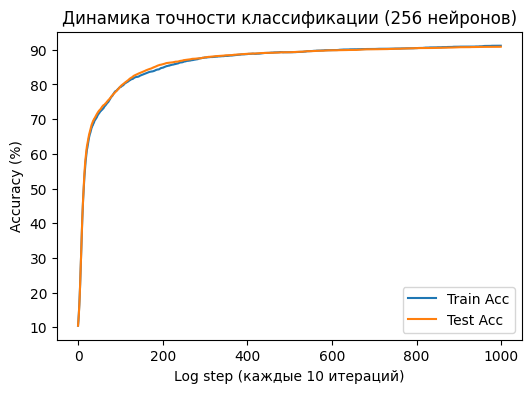

In [ ]:
start_time = time.time()

for i in range(num_iterations):
    logits_train = model(X_train)
    loss_value = loss_fn(logits_train, y_train)

    optimizer.zero_grad()
    loss_value.backward()
    optimizer.step()

    if (i + 1) % 10 == 0:
        acc_train = accuracy(logits_train, y_train)
        with torch.no_grad():
            logits_test = model(X_test)
            acc_test = accuracy(logits_test, y_test)

        history_bigger_layer["train_loss"].append(loss_value.item())
        history_bigger_layer["train_acc"].append(acc_train)
        history_bigger_layer["test_acc"].append(acc_test)

        clear_output(wait=True)
        print(f"Iteration {i+1}/{num_iterations}")
        print(f"Loss: {loss_value.item():.4f}")
        print(f"Train Accuracy: {acc_train:.2f}%")
        print(f"Test  Accuracy: {acc_test:.2f}%")

        plt.figure(figsize=(6, 4))
        plt.plot(history_bigger_layer["train_acc"], label="Train Acc")
        plt.plot(history_bigger_layer["test_acc"],  label="Test Acc")
        plt.xlabel("Log step (каждые 10 итераций)")
        plt.ylabel("Accuracy (%)")
        plt.legend()
        plt.title("Динамика точности классификации (256 нейронов)")
        plt.show()

end_time = time.time()



In [20]:
print(f"Обучение заняло {end_time - start_time:.2f} секунд.")

Обучение заняло 236.56 секунд.


Теперь попробуйте добавить к сети еще один слой.

In [12]:
# Создаем сеть с ДВУМЯ скрытыми слоями
# Например: 196 -> 256 -> 128 -> 10
model = nn.Sequential(
    nn.Linear(196, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

# Функция потерь и оптимизатор
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)



In [13]:
num_iterations = 10_000
history_2layers = {"train_acc": [], "test_acc": []}

def accuracy(logits: torch.Tensor, labels: torch.Tensor) -> float:
    """
    Возвращает процент правильных предсказаний (accuracy).
    logits: выход модели (логиты), размер [N, 10]
    labels: истинные метки (целые числа), размер [N]
    """
    preds = torch.argmax(logits, dim=1)
    return (preds == labels).float().mean().item() * 100


Iteration 10000/10000
Loss: 0.2430, Train Acc: 92.60%, Test Acc: 91.57%


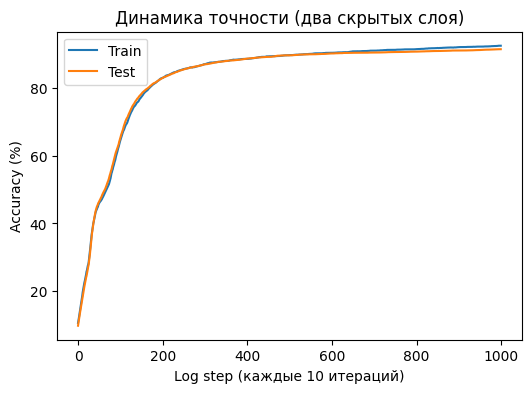

Обучение заняло 291.29 секунд.


In [14]:
start_time = time.time()

for i in range(num_iterations):
    # Прямой проход
    logits_train = model(X_train)
    loss_value = loss_fn(logits_train, y_train)
    
    # Обратный проход
    optimizer.zero_grad()
    loss_value.backward()
    optimizer.step()

    # Каждые 10 итераций выводим результаты
    if (i + 1) % 10 == 0:
        # Точность на обучающей выборке
        train_acc = accuracy(logits_train, y_train)
        # Точность на тестовой выборке
        with torch.no_grad():
            logits_test = model(X_test)
            test_acc = accuracy(logits_test, y_test)

        history_2layers["train_acc"].append(train_acc)
        history_2layers["test_acc"].append(test_acc)

        clear_output(wait=True)
        print(f"Iteration {i+1}/{num_iterations}")
        print(f"Loss: {loss_value.item():.4f}, Train Acc: {train_acc:.2f}%, Test Acc: {test_acc:.2f}%")

        # График
        plt.figure(figsize=(6,4))
        plt.plot(history_2layers["train_acc"], label="Train")
        plt.plot(history_2layers["test_acc"],  label="Test")
        plt.xlabel("Log step (каждые 10 итераций)")
        plt.ylabel("Accuracy (%)")
        plt.title("Динамика точности (два скрытых слоя)")
        plt.legend()
        plt.show()

end_time = time.time()
print(f"Обучение заняло {end_time - start_time:.2f} секунд.")

Насколько дольше обучается нейросеть? Получилось ли улучшить качество?

**Ответ:**

1. **Время обучения** выросло с ~236.56 секунд до ~291.29 секунд, то есть примерно на **54.7 секунд** дольше (примерно на 23% дольше, чем в предыдущем варианте).

2. **Качество на тестовой выборке** улучшилось с 90.86% до 91.57%, то есть примерно на **0.7 процентного пункта**.  

В итоге более глубокая сеть действительно повысила точность классификации, хотя и потребовала дополнительных вычислительных затрат.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- b3240ec0d2bdd17c426e5b24c03277bc -->
Сделайте выводы.

**Выводы** по проделанной работе:

1. **Увеличение числа нейронов** в скрытом слое и добавление **дополнительного слоя** позволяют добиться более высоких показателей точности. В нашем случае, мы смогли улучшить точность с ~90.86% до ~91.57%, то есть примерно на 0.7 процентного пункта.

2. **Время обучения** при этом выросло с ~236 секунд до ~291 секунды, то есть примерно на 23%. Это показывает, что усложнение модели (большее количество параметров) требует дополнительного времени для обучения, особенно если всё происходит на CPU.

3. Даже с добавлением второго скрытого слоя и увеличением числа нейронов итоговый результат в районе 91–92% точности на MNIST (при уменьшении изображений до 14×14 пикселей и обучающей выборке в 10 000 примеров) &mdash; это нормальные показатели.
4. **Итог**: усложнение архитектуры дало **небольшой, но ощутимый прирост** качества классификации, при этом повысив вычислительную нагрузку. Это ожидаемое поведение при переходе от простой однослойной сети к более сложной архитектуре.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->
---

**Мы продолжим работу с нейросетями во второй части этого домашнего задания, которую вы можете сдать на неделю позже первой.**

Вы могли заметить, что качество наших моделей было не таким высоким, как можно было бы получить современными моделями. Тем не менее отметим, что сравнивать с моделью KNN, которую мы рассмотрели на первом занятии, было бы некорректно, так как там использовалась более простая выборка.

Обучение нейронных сетей — это довольно сложная задача. Чтобы глубокие сети обучались более стабильно, используются специальные технологии, изучение которых требует больших усилий. Например, на следующей лекции мы рассмотрим сверточные слои и другие подходы к созданию и обучению нейросетей для анализа изображений.
Полное погружение в мир нейросетей, включая самые современные архитектуры, ожидает вас на третьем курсе. Например, на DS-потоке будет порядка 14 лекций по этой теме.

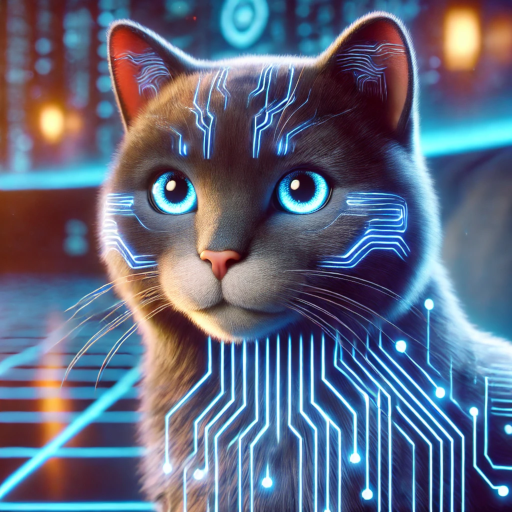